# Descarga del dataset

In [ ]:
%%bash
if [[ ! -d "dataset" ]]; then
  mkdir dataset
  curl -L -o dataset/70-dog-breedsimage-data-set.zip\
    https://www.kaggle.com/api/v1/datasets/download/gpiosenka/70-dog-breedsimage-data-set
  unzip dataset/70-dog-breedsimage-data-set.zip -d dataset
fi

Archive:  dataset/70-dog-breedsimage-data-set.zip
  inflating: dataset/dogs.csv        
  inflating: dataset/test/Afghan/01.jpg  
  inflating: dataset/test/Afghan/02.jpg  
  inflating: dataset/test/Afghan/03.jpg  
  inflating: dataset/test/Afghan/04.jpg  
  inflating: dataset/test/Afghan/05.jpg  
  inflating: dataset/test/Afghan/06.jpg  
  inflating: dataset/test/Afghan/07.jpg  
  inflating: dataset/test/Afghan/08.jpg  
  inflating: dataset/test/Afghan/09.jpg  
  inflating: dataset/test/Afghan/10.jpg  
  inflating: dataset/test/African Wild Dog/01.jpg  
  inflating: dataset/test/African Wild Dog/02.jpg  
  inflating: dataset/test/African Wild Dog/03.jpg  
  inflating: dataset/test/African Wild Dog/04.jpg  
  inflating: dataset/test/African Wild Dog/05.jpg  
  inflating: dataset/test/African Wild Dog/06.jpg  
  inflating: dataset/test/African Wild Dog/07.jpg  
  inflating: dataset/test/African Wild Dog/08.jpg  
  inflating: dataset/test/African Wild Dog/09.jpg  
  inflating: dataset/tes

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  214M  100  214M    0     0  84.8M      0  0:00:02  0:00:02 --:--:--  142M


# Análisis exploratorio de datos


Los datos se obtienen del siguiente [dataset de Kaggle](https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set?resource=download),

## Cargar datos


In [ ]:
import pandas as pd

df_dogs = pd.read_csv("dataset/dogs.csv")
print(df_dogs.head())

              filepaths  labels data set
0  train/Afghan/001.jpg  Afghan    train
1  train/Afghan/002.jpg  Afghan    train
2  train/Afghan/003.jpg  Afghan    train
3  train/Afghan/004.jpg  Afghan    train
4  train/Afghan/005.jpg  Afghan    train


In [ ]:
print("Dataframe Info:")
df_dogs.info()

print("Dataframe describe:")
print(df_dogs.describe())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9346 entries, 0 to 9345
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  9346 non-null   object
 1   labels     9346 non-null   object
 2   data set   9346 non-null   object
dtypes: object(3)
memory usage: 219.2+ KB
Dataframe describe:
                  filepaths    labels data set
count                  9346      9346     9346
unique                 9346        71        3
top     valid/Yorkie/10.jpg  Shih-Tzu    train
freq                      1       218     7946


In [ ]:
print("Valores faltantes por columna:")
print(df_dogs.isnull().sum())

Valores faltantes por columna:
filepaths    0
labels       0
data set     0
dtype: int64


## Distribución de razas

Para analizar la distribución de razas primero contamos las ocurrencias de cada
valor en la columna `labels` del dataset.

In [ ]:
breed_counts = df_dogs['labels'].value_counts(sort=True, ascending=False)

Vemos que en total son 71 las clases de perro en todo el dataset

In [ ]:
breed_counts.shape

(71,)

Esta son las 5 clases con más ocurrencias

In [ ]:
breed_counts.head()

,count
labels,
Shih-Tzu,218
Lhasa,207
Labrador,181
Basset,179
Scotch Terrier,170


Y estas las 5 clases con menos ocurrencias

In [ ]:
breed_counts.tail()

,count
labels,
Newfoundland,98
Yorkie,98
Saint Bernard,98
American Hairless,85
American Spaniel,10


Separamos los datos en base al dataset al que corresponden para el análisis

In [ ]:
df_dogs['data set'].value_counts()

,count
data set,
train,7946
test,700
valid,700


In [ ]:
df_train = df_dogs[df_dogs['data set'] == 'train']
df_test  = df_dogs[df_dogs['data set'] == 'test']
df_valid = df_dogs[df_dogs['data set'] == 'valid']

Generamos una función que recibe un dataset y nos devuelve un gráfico sobre la distribución de las razas

In [ ]:
import matplotlib.pyplot as plt

def count_labels(df, df_title):
  label_counts = df['labels'].value_counts()

  label_percentages = (label_counts / df.shape[0]) * 100

  distribution_df = pd.DataFrame({
      'Total': label_counts,
      'Porcentaje (%)': label_percentages
  })

  print(distribution_df)

  plt.figure(figsize=(15, 8))
  label_counts.plot(kind='bar')
  plt.title(df_title)
  plt.xlabel('Raza de perros')
  plt.ylabel('Cantidad de imagenes')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

En el gráfico vemos que el dataset de train es el que tiene el desbalanceo de las clases, esto será un problema a la hora de entrenar modelos y deberíamos aplicar técnicas como **undersampling** o **data augmentation** para equilibrar la cantidad de clases.

                   Total  Porcentaje (%)
labels                                  
Shih-Tzu             198        2.491820
Lhasa                187        2.353385
Labrador             161        2.026177
Basset               159        2.001007
Scotch Terrier       150        1.887742
...                  ...             ...
Boston Terrier        79        0.994211
Saint Bernard         78        0.981626
Newfoundland          78        0.981626
Yorkie                78        0.981626
American Hairless     65        0.818022

[70 rows x 2 columns]


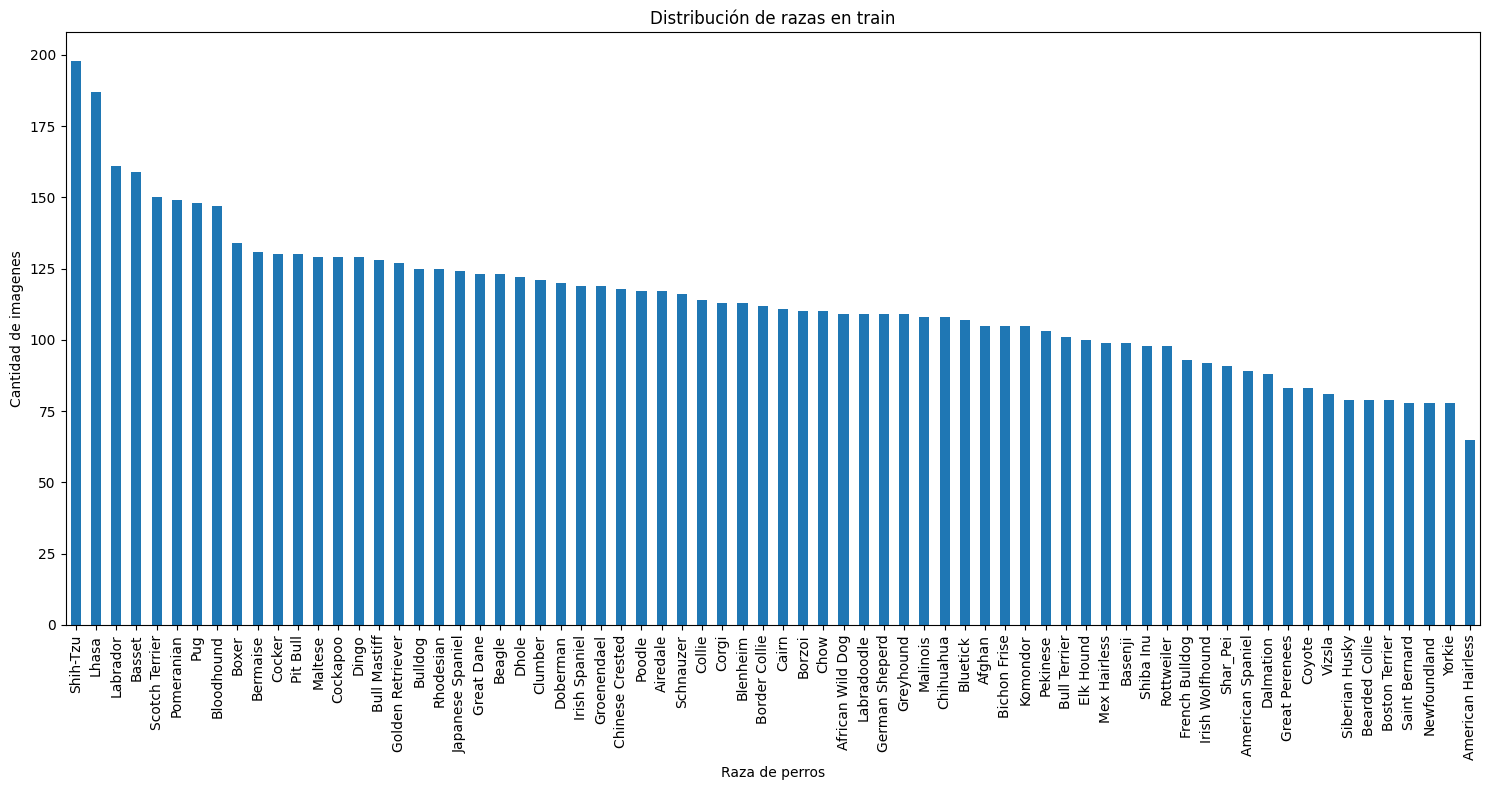

In [ ]:
count_labels(df_train, 'Distribución de razas en train')

                   Total  Porcentaje (%)
labels                                  
Afghan                10        1.428571
African Wild Dog      10        1.428571
Airedale              10        1.428571
American  Spaniel     10        1.428571
American Hairless     10        1.428571
...                  ...             ...
Shiba Inu             10        1.428571
Shih-Tzu              10        1.428571
Siberian Husky        10        1.428571
Vizsla                10        1.428571
Yorkie                10        1.428571

[70 rows x 2 columns]


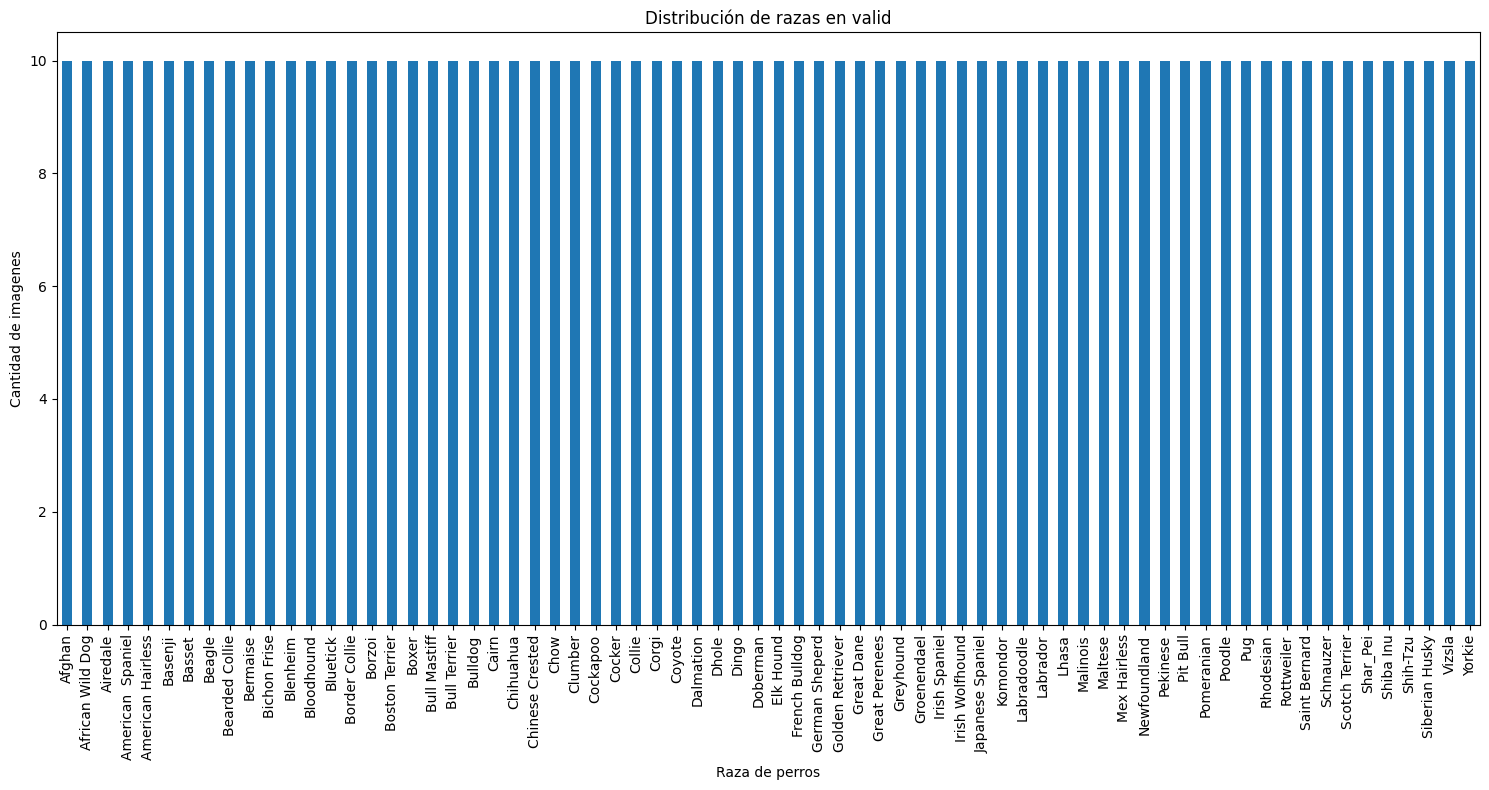

In [ ]:
count_labels(df_valid, 'Distribución de razas en valid')

                   Total  Porcentaje (%)
labels                                  
Afghan                10        1.428571
African Wild Dog      10        1.428571
Airedale              10        1.428571
American Hairless     10        1.428571
American Spaniel      10        1.428571
...                  ...             ...
Shiba Inu             10        1.428571
Shih-Tzu              10        1.428571
Siberian Husky        10        1.428571
Vizsla                10        1.428571
Yorkie                10        1.428571

[70 rows x 2 columns]


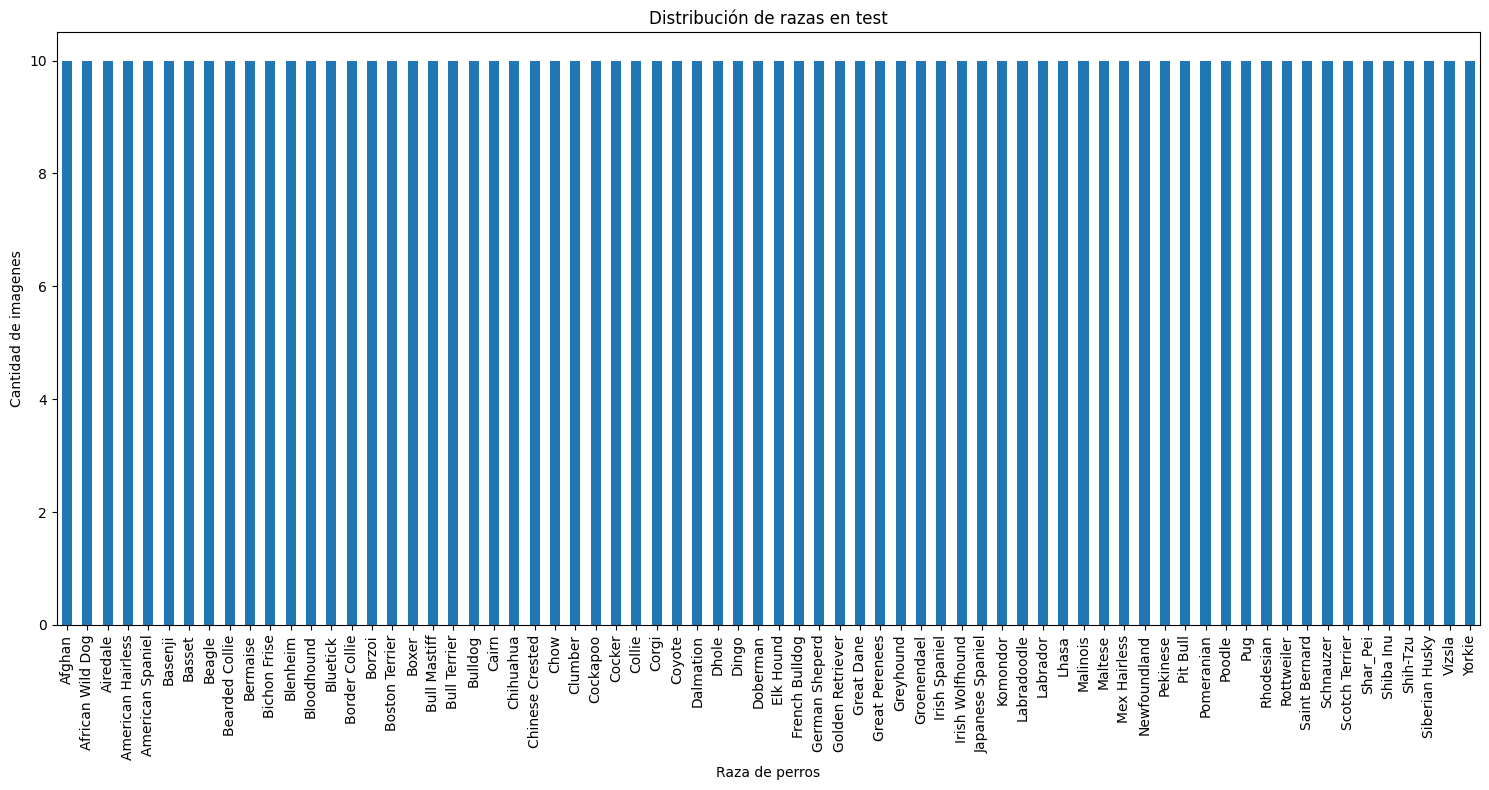

In [ ]:
count_labels(df_test, 'Distribución de razas en test')

## Análisis de consistencia entre clases de los datasets
Ahora vamos a separar las clases de cada dataset para asegurarnos que el dataset de test y validación esté contenido en el dataset de train. Esto asegura que el modelo haya visto previamente todas las clases que deberá evaluar

In [ ]:
train_labels = set(df_train['labels'].unique())
test_labels  = set(df_test['labels'].unique())
valid_labels = set(df_valid['labels'].unique())

In [ ]:
test_labels - train_labels

set()

In [ ]:
valid_labels - train_labels

{'American  Spaniel'}

Notamos una incosistencia entre los datasets de validación y entrenamiento, la clase *American Spaniel* no se encuentra en el conjunto de entrenamiento, por lo que el modelo fallará al intentar evaluar esta clase duranta la fase de validación.